# Capstone Project - Cuisine Categorization by the recipe of ingredients

In [1]:
# for Python 2: use print only as a function
from __future__ import print_function

## Data Exploration and Adding features


In [3]:
import pandas as pd 

In [4]:
train = pd.read_json('../data/train.json')
test = pd.read_json('../data/test.json')

In [5]:
train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [6]:
train.shape

(39774, 3)

In [7]:
test.shape

(9944, 2)

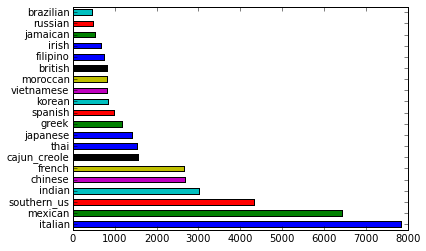

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

train['cuisine'].value_counts().plot(kind='barh')

##Exploratory Visualization

Next, let me explore on the data exploration. especially on

* how many ingredients there are? Out them, find the unique ingredients.
* how these ingredients made up of individual words?

In [9]:
import re

total_ingredients = []Exploratory Visualization
for lst_ingredients in train.ingredients:
    total_ingredients += [ingredient.lower() for ingredient in lst_ingredients]

no_of_ingredients = len(total_ingredients)
uniq_ingredients = len(set(total_ingredients))

print(no_of_ingredients)
print(uniq_ingredients)

428275
6703


In [10]:
word_split = re.compile('[,. ]+')
total_ingredient_words = []

for ingredients in total_ingredients:
    total_ingredient_words += re.split(word_split, ingredients)
    
no_of_ingredients_words = len(total_ingredient_words)
uniq_ingredients_words = len(set(total_ingredient_words))

print(no_of_ingredients_words)
print(uniq_ingredients_words)

807802
3152


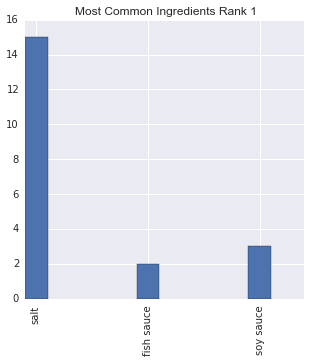

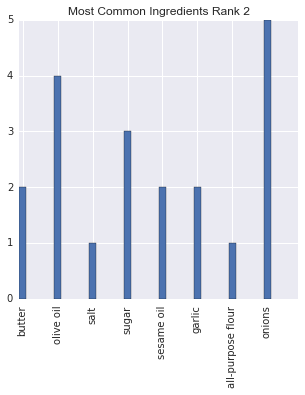

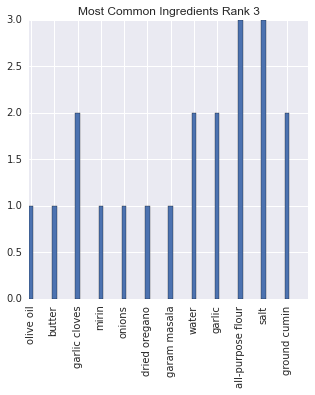

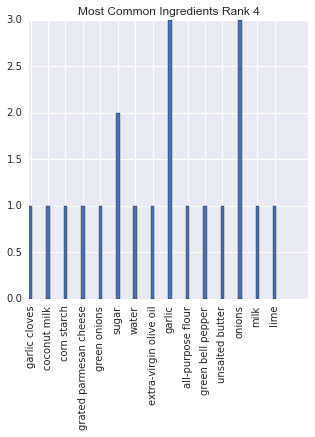

In [12]:
from collections import Counter
import seaborn as sns
import numpy as np

cntr = {}
for c in train['cuisine'].unique():
    cntr[c] = Counter()
    idx = (train['cuisine'] == c)
    for ingredients in train[idx]['ingredients']:
        cntr[c].update(ingredients)

common_ingredients = pd.DataFrame([[items[0] for items in cntr[c].most_common(5)] for c in cntr],
            index=[c for c in cntr],
            columns=['Most_Common_{}'.format(i) for i in range(1, 6)])

common_ingredients

counter1 = Counter(common_ingredients['Most_Common_1'])

ing_name1 = counter1.keys()
ing_count1 = counter1.values()

counter2 = Counter(common_ingredients['Most_Common_2'])
ing_name2 = counter2.keys()
ing_count2 = counter2.values()

counter3 = Counter(common_ingredients['Most_Common_3'])
ing_name3 = counter3.keys()
ing_count3 = counter3.values()

counter4 = Counter(common_ingredients['Most_Common_4'])
ing_name4 = counter4.keys()
ing_count4 = counter4.values()

fig = plt.figure(figsize=(5, 5))
#fig, ax = plt.subplots(4, 4, figsize=(40, 40))

# Plot histogram using matplotlib bar().
indexes = np.arange(len(ing_name1))
width = 0.2
plt.bar(indexes, ing_count1, width)
plt.xticks(indexes + width * 0.5, ing_name1,rotation='vertical')
plt.title('Most Common Ingredients Rank 1')
plt.show()
fig.savefig('rank1.png')

fig = plt.figure(figsize=(5, 5))
indexes = np.arange(len(ing_name2))
width = 0.2
plt.bar(indexes, ing_count2, width)
plt.xticks(indexes + width * 0.5, ing_name2,rotation='vertical')
plt.title('Most Common Ingredients Rank 2')
plt.show()
fig.savefig('rank2.png')

fig = plt.figure(figsize=(5, 5))
indexes = np.arange(len(ing_name3))
width = 0.2
plt.bar(indexes, ing_count3, width)
plt.xticks(indexes + width * 0.5, ing_name3,rotation='vertical')
plt.title('Most Common Ingredients Rank 3')
plt.show()
fig.savefig('rank3.png')

fig = plt.figure(figsize=(5, 5))
indexes = np.arange(len(ing_name4))
width = 0.2
plt.bar(indexes, ing_count4, width)
plt.xticks(indexes + width * 0.5, ing_name4,rotation='vertical')
plt.title('Most Common Ingredients Rank 4')
plt.show()
fig.savefig('rank4.png')


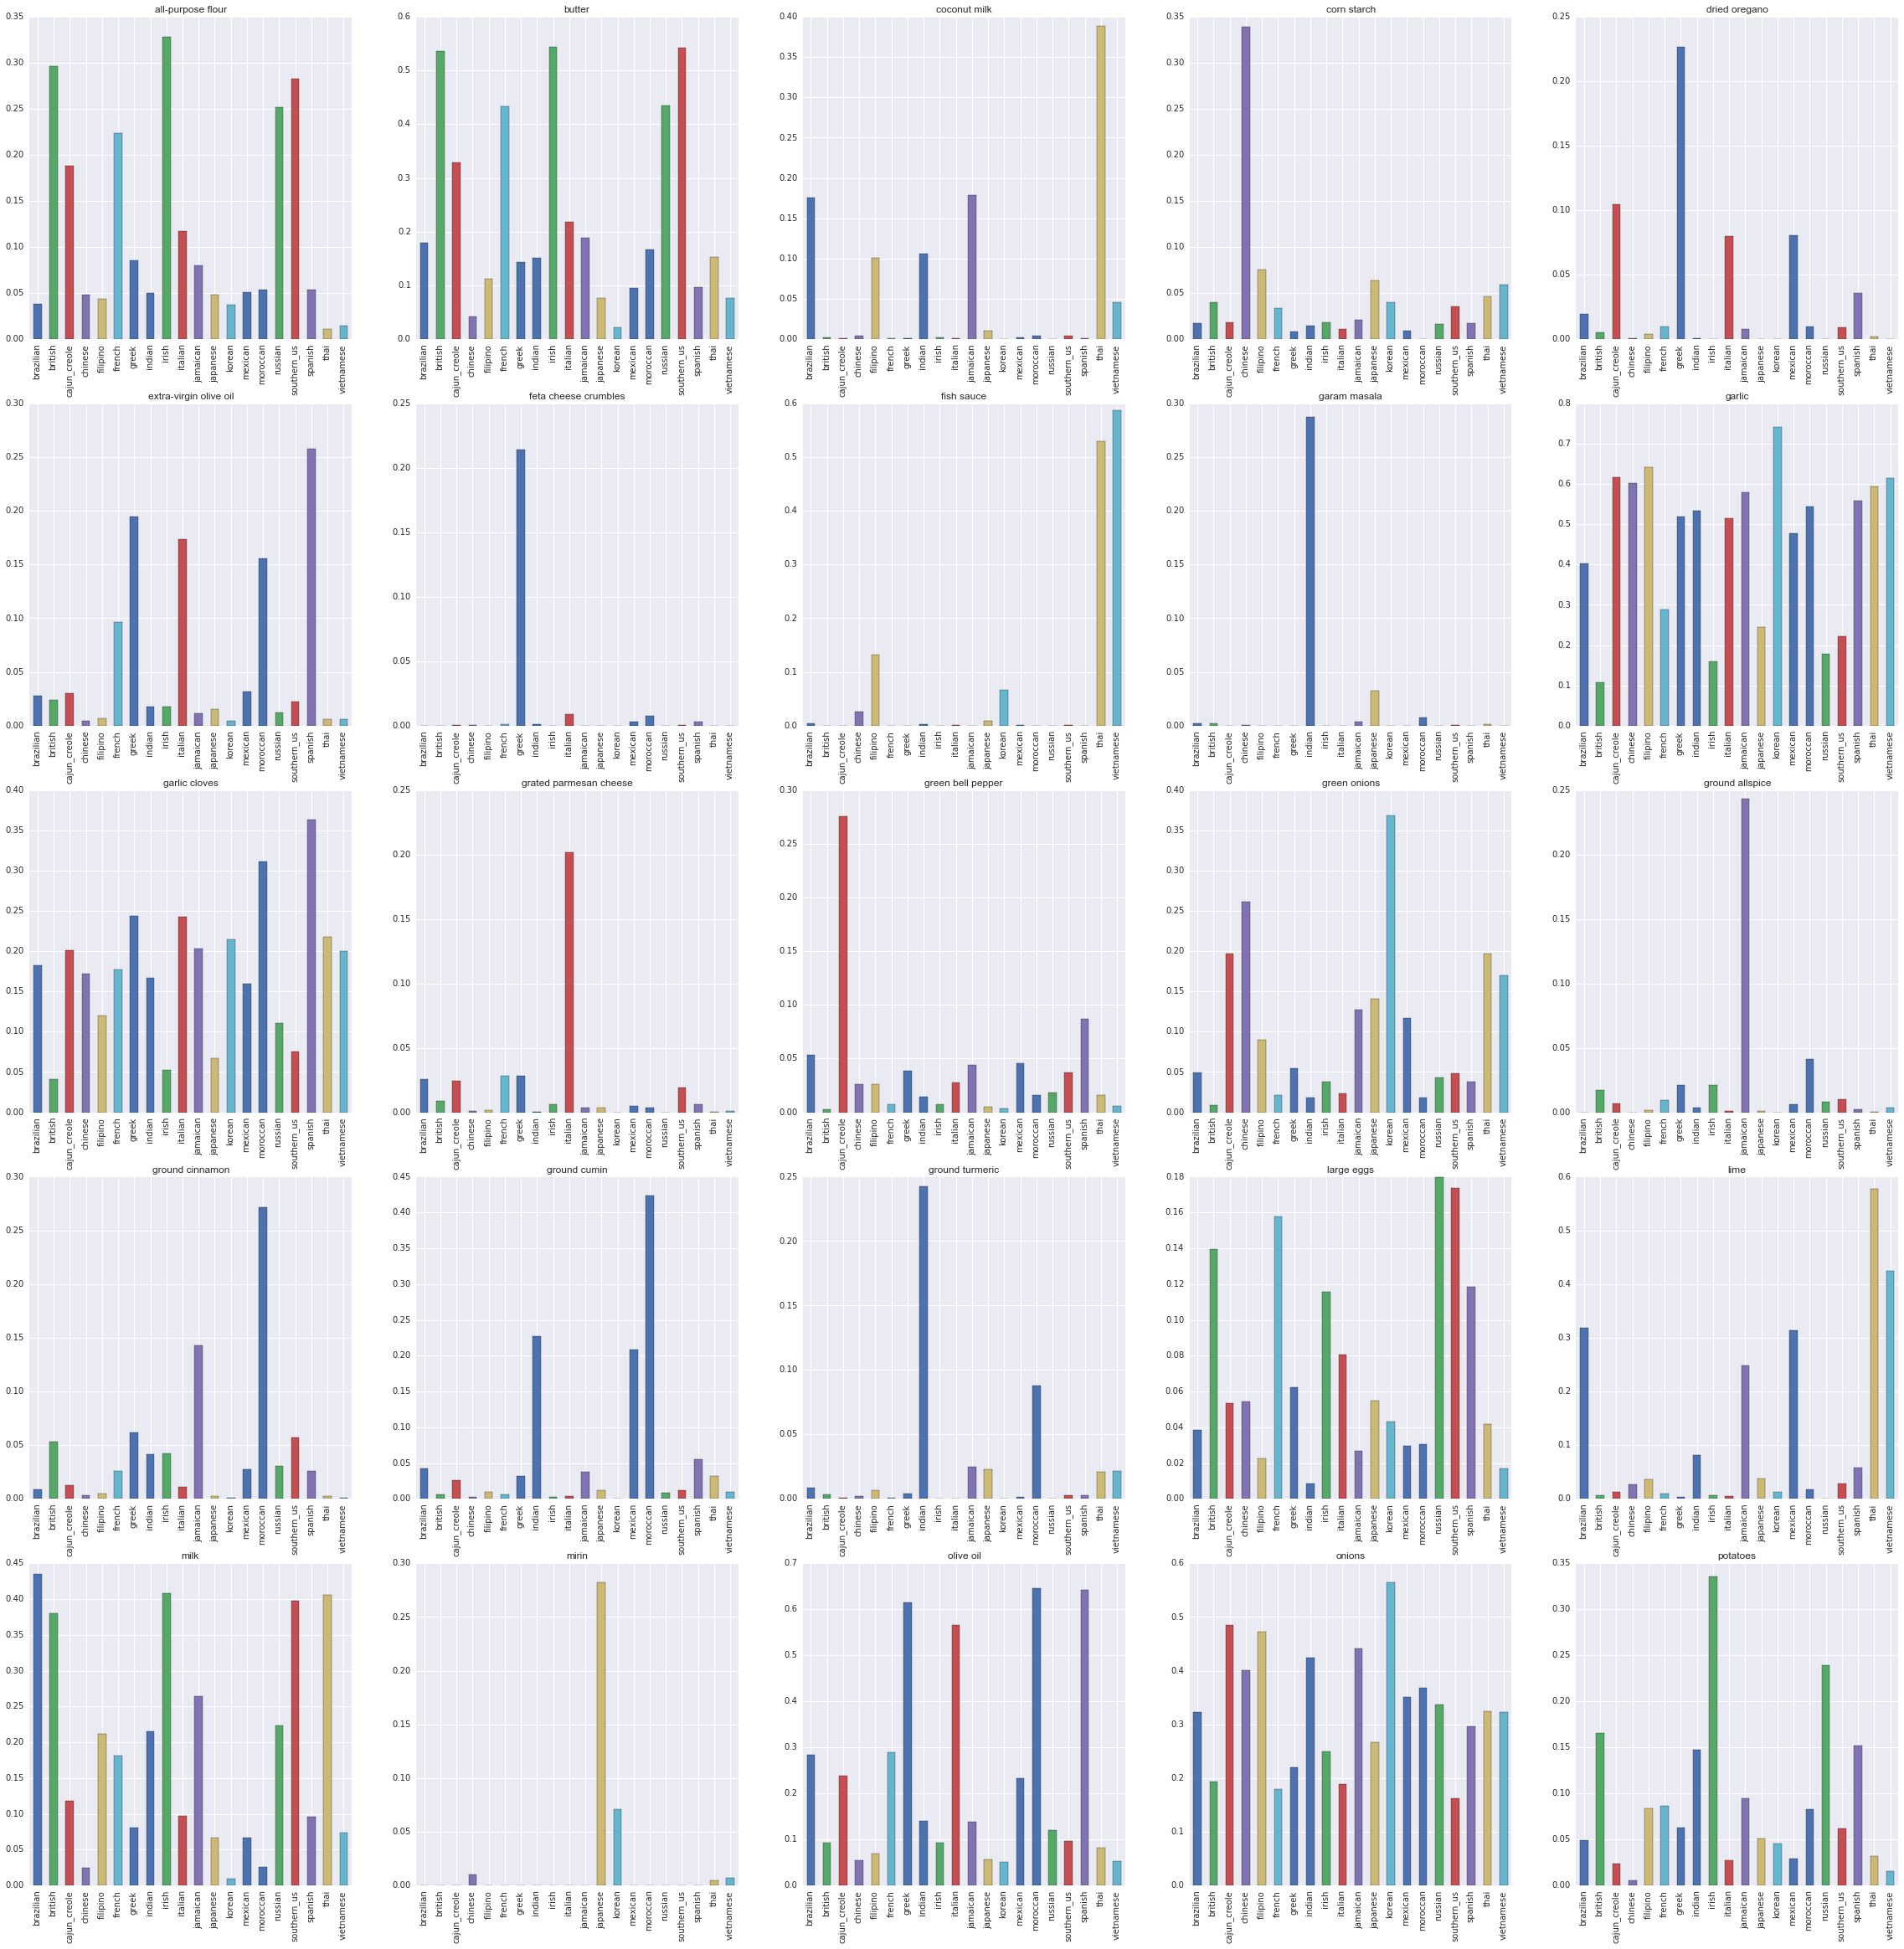

In [13]:
list_ingredients = np.unique(common_ingredients.values.ravel())

train['total_ingredients'] = train['ingredients'].map(":".join)

fig, ax = plt.subplots(5, 5, figsize=(40, 40))
for ingredient, ax_idx in zip(list_ingredients, range(25)):
    indexes = train['total_ingredients'].str.contains(ingredient)
    ingredient_occur = (train[indexes]['cuisine'].value_counts() / train['cuisine'].value_counts())
    ingredient_occur.plot(kind='bar', ax=ax.ravel()[ax_idx], fontsize=10, title=ingredient)

fig.savefig('ingredient_occur.plot.png')


## Benchmark Model

In [14]:
from text_unidecode import unidecode

def xform_string(str_list):
    return ", ".join([
        unidecode(str).lower()
        for str in str_list
    ])


In [15]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

train_features= train.drop('cuisine', axis = 1)
train_cuisine = pd.DataFrame(train['cuisine'])

# Split the 'features' and 'Yummly' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_features, 
                                                    train_cuisine , 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))
print (y_train.shape[0])
print (y_test.shape[0])
X_train.shape



Training set has 31819 samples.
Testing set has 7955 samples.
31819
7955


C:\_workspace\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(31819, 3)

In [16]:
X_test.shape
#X_test.head

(7955, 3)

In [17]:
y_train.shape
y_train.head

<bound method DataFrame.head of             cuisine
11565       mexican
16731    vietnamese
8528     vietnamese
35117  cajun_creole
13945        french
20636        french
23333         irish
23074    vietnamese
26561        indian
27456        indian
10244       italian
25412        french
11744       italian
37608      japanese
33820       chinese
25682       chinese
24603        french
36673   southern_us
30867       mexican
38730       mexican
14664       mexican
36531       italian
33022        indian
12763        french
5455           thai
29636       mexican
9138         indian
717    cajun_creole
36866          thai
25601  cajun_creole
...             ...
33523    vietnamese
31921      japanese
24675       italian
2496    southern_us
7599        italian
1871         french
18430       italian
7877        chinese
37619       spanish
5072        mexican
2163       japanese
38804       mexican
6921       filipino
38984        indian
27469       british
16921  cajun_creole
35665   

In [18]:
y_test.shape

(7955, 1)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

# Preprocessing
vector = CountVectorizer(
    preprocessor = xform_string,
    analyzer = "word",
    token_pattern = r"(?u)\b[a-z]{2,40}\b",
    max_features = 4500
)

vector.fit(np.concatenate([X_train.ingredients, X_test.ingredients]))

print ("Total No. of features:", len(vector.get_feature_names()))

Total No. of features: 2993


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Train
clf_A = RandomForestClassifier(
    n_estimators = 50,
    oob_score = True,
    verbose = 10,
    n_jobs = 5
)


# Train
clf_B =  DecisionTreeClassifier(random_state = 42)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#RandomForest
benchmark_model_A = Pipeline([
    ("vector", vector),
    ("scl", StandardScaler(with_mean=False)),
    ("clf_A", clf_A)
])

benchmark_model_A.fit(X_train.ingredients,y_train.cuisine)

print ("#")
print ("# Best score:", benchmark_model_A.named_steps["clf_A"].oob_score_)
print ("#")

#DecisionTree
benchmark_model_B = Pipeline([
    ("vector", vector),
    ("scl", StandardScaler(with_mean=False)),
    ("clf_B", clf_B)
])

benchmark_model_B.fit(X_train.ingredients,y_train.cuisine)

C:\_workspace\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    4.3s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:    6.9s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    9.5s
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   12.8s
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   16.4s
[Parallel(n_jobs=5)]: Done  47 out of  50 | elapsed:   18.9s remaining:    1.1s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:   19.8s finished


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

Pipeline(memory=None,
     steps=[('vector', CountVectorizer(analyzer='word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=4500, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function xform_string a...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))])

In [22]:
#Metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_score

pred_results_A = benchmark_model_A.predict(X_test.ingredients)
print(pred_results_A)

# Train and Test Accuracy for Random Forest
print ("Train Accuracy for Random Forest :: ", accuracy_score(y_train, benchmark_model_A.predict(X_train.ingredients)))
print ("Test Accuracy for Random Forest  :: ", accuracy_score(y_test, pred_results_A))

print ("F-Score on Test for Random Forest :: ",fbeta_score(y_test, pred_results_A,average=None, beta = 0.5))
  
pred_results_B = benchmark_model_B.predict(X_test.ingredients)
print(pred_results_B)

# Train and Test Accuracy for  Decision Tree
print ("Train Accuracy for Decision Tree :: ", accuracy_score(y_train, benchmark_model_B.predict(X_train.ingredients)))
print ("Test Accuracy for Decision Tree  :: ", accuracy_score(y_test, pred_results_B))

print ("F-Score on Test for Decision Tree :: ",fbeta_score(y_test, pred_results_B,average=None, beta = 0.5))


[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  47 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done  47 out of  50 | elapsed:    0

[u'mexican' u'mexican' u'indian' ... u'korean' u'chinese' u'italian']
Train Accuracy for Random Forest ::  0.9995285835507087
Test Accuracy for Random Forest  ::  0.754242614707731
F-Score on Test for Random Forest ::  [0.77039275 0.55194805 0.71315372 0.75520048 0.62022901 0.56403051
 0.7688172  0.83874612 0.59055118 0.75391332 0.77844311 0.76701822
 0.82533589 0.85977911 0.8056872  0.5952381  0.69250871 0.69469835
 0.74528302 0.66666667]
[u'french' u'mexican' u'indian' ... u'korean' u'chinese' u'italian']
Train Accuracy for Decision Tree ::  0.999622866840567
Test Accuracy for Decision Tree  ::  0.637460716530484
F-Score on Test for Decision Tree ::  [0.54945055 0.32913165 0.50671141 0.69538792 0.34801136 0.42744657
 0.56394316 0.75007638 0.39669421 0.73931889 0.48804781 0.59968229
 0.5104551  0.81358491 0.54224464 0.30373832 0.58120265 0.40251572
 0.60959792 0.45608108]


In [23]:
#Metrics

from sklearn.metrics import log_loss

clf_probs_A =  benchmark_model_A.predict_proba(X_test.ingredients)
clf_probs_B =  benchmark_model_B.predict_proba(X_test.ingredients)

#print(clf_probs_A)

score_A = log_loss(y_test, clf_probs_A)
print("Log Loss for Random Forest :: ",score_A)

score_B = log_loss(y_test, clf_probs_B)
print("Log Loss for Decision Tree :: ",score_B)

[Parallel(n_jobs=5)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  47 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.1s finished


Log Loss for Random Forest ::  1.312711556927781
Log Loss for Decision Tree ::  12.51749574366924


In [24]:
#Kaggle submission files

pred_results_A = benchmark_model_A.predict(test.ingredients)
test['cuisine'] = pred_results_A
print(pred_results_A)

out_file= "../data/bench_mark_random_forest.csv"
op = pd.DataFrame(data={
        "id": test.id,
        "cuisine": test.cuisine
        })
op.sort_values(by="id", inplace=True)
op.to_csv(out_file, columns=["id", "cuisine"], index=False, quoting=3)
print ("Submission for bench_mark Random Forest written to", out_file)


pred_results_B = benchmark_model_B.predict(test.ingredients)
test['cuisine'] = pred_results_B
print(pred_results_B)

out_file= "../data/bench_mark_decision_tree.csv"
op = pd.DataFrame(data={
        "id": test.id,
        "cuisine": test.cuisine
        })
op.sort_values(by="id", inplace=True)
op.to_csv(out_file, columns=["id", "cuisine"], index=False, quoting=3)
print ("Submission for bench_mark Decision Tree written to", out_file)

[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  47 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.1s finished


[u'southern_us' u'southern_us' u'italian' ... u'italian' u'southern_us'
 u'mexican']
Submission for bench_mark Random Forest written to ../data/bench_mark_random_forest.csv
[u'southern_us' u'french' u'italian' ... u'brazilian' u'southern_us'
 u'mexican']
Submission for bench_mark Decision Tree written to ../data/bench_mark_decision_tree.csv


In [25]:
# a function that adds new features and the dataframe

def add_features(df): 
    
    # no of ingredients
    df['no_ingredients'] = df.ingredients.apply(len)
    
    # average length of ingredient names
    df['ingredient_len'] = df.ingredients.apply(lambda x: np.mean([len(item) for item in x]))
    
    # make strings of the ingredients list
    df['ingredients_string'] = df.ingredients.astype(str)
    
    return df

In [26]:
# create the same features in the training data and the new data
train = add_features(pd.read_json('../data/train.json'))
new = add_features(pd.read_json('../data/test.json'))

In [27]:
train.head()

,cuisine,id,ingredients,no_ingredients,ingredient_len,ingredients_string
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",9,12.000000,"[u'romaine lettuce', u'black olives', u'grape ..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",11,10.090909,"[u'plain flour', u'ground pepper', u'salt', u'..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,10.333333,"[u'eggs', u'pepper', u'salt', u'mayonaise', u'..."
3,indian,22213,"[water, vegetable oil, wheat, salt]",4,6.750000,"[u'water', u'vegetable oil', u'wheat', u'salt']"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",20,10.100000,"[u'black pepper', u'shallots', u'cornflour', u..."


In [28]:
train.shape

(39774, 6)

In [29]:
new.head()

,id,ingredients,no_ingredients,ingredient_len,ingredients_string
0,18009,"[baking powder, eggs, all-purpose flour, raisi...",6,9.333333,"[u'baking powder', u'eggs', u'all-purpose flou..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...",11,10.272727,"[u'sugar', u'egg yolks', u'corn starch', u'cre..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil...",6,9.666667,"[u'sausage links', u'fennel bulb', u'fronds', ..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,...",21,12.000000,"[u'meat cuts', u'file powder', u'smoked sausag..."
4,35687,"[ground black pepper, salt, sausage casings, l...",8,13.000000,"[u'ground black pepper', u'salt', u'sausage ca..."


In [30]:
new.shape

(9944, 5)

## Optimize Cross Validation using Pipeline

In [31]:
# assign X and y
X = train.ingredients_string
y = train.cuisine

In [32]:
# X is just an ingredient series
X.head()

0    [u'romaine lettuce', u'black olives', u'grape ...
1    [u'plain flour', u'ground pepper', u'salt', u'...
2    [u'eggs', u'pepper', u'salt', u'mayonaise', u'...
3      [u'water', u'vegetable oil', u'wheat', u'salt']
4    [u'black pepper', u'shallots', u'cornflour', u...
Name: ingredients_string, dtype: object

In [33]:
# define the regex pattern for teh purpose of tokenization
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(token_pattern=r"'([a-z ]+)'")

In [34]:
# import and declare the Multinomial Naive Bayes along with the default parameters
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [35]:
# Assign the Naive Bayes with a pipeline of vectorization
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(vector, mnb)

In [36]:
# explore the pipeline steps
pipeline.steps

[('countvectorizer',
  CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
          dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
          lowercase=True, max_df=1.0, max_features=None, min_df=1,
          ngram_range=(1, 1), preprocessor=None, stop_words=None,
          strip_accents=None, token_pattern="'([a-z ]+)'", tokenizer=None,
          vocabulary=None)),
 ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]

In [37]:
# cross validate the full pipeline
from sklearn.cross_validation import cross_val_score
cross_val_score(pipeline, X, y, cv=7, scoring='accuracy').mean()

0.7336449200974411

In [38]:
# pipeline steps are automatically assigned names by make_pipeline
pipeline.named_steps.keys()

['multinomialnb', 'countvectorizer']

In [39]:
# create a grid of parameters to search (and specify the pipeline step along with the parameter)
parameters_grid = {}
parameters_grid['countvectorizer__token_pattern'] = [r"\b\w\w+\b", r"'([a-z ]+)'"]
parameters_grid['multinomialnb__alpha'] = [0.5, 1]
parameters_grid

{'countvectorizer__token_pattern': ['\\b\\w\\w+\\b', "'([a-z ]+)'"],
 'multinomialnb__alpha': [0.5, 1]}

In [40]:
# pass the pipeline (instead of the model) to GridSearchCV
from sklearn.grid_search import GridSearchCV
gridCV = GridSearchCV(pipeline, parameters_grid , cv=7, scoring='accuracy')

C:\_workspace\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [41]:
# time the grid search
%time gridCV.fit(X, y)

Wall time: 50.2 s


GridSearchCV(cv=7, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1)...  vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'countvectorizer__token_pattern': ['\\b\\w\\w+\\b', "'([a-z ]+)'"], 'multinomialnb__alpha': [0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [42]:
# examine the score for each combination of parameters
gridCV.grid_scores_

[mean: 0.72459, std: 0.00591, params: {'countvectorizer__token_pattern': '\\b\\w\\w+\\b', 'multinomialnb__alpha': 0.5},
 mean: 0.72525, std: 0.00535, params: {'countvectorizer__token_pattern': '\\b\\w\\w+\\b', 'multinomialnb__alpha': 1},
 mean: 0.74833, std: 0.00558, params: {'countvectorizer__token_pattern': "'([a-z ]+)'", 'multinomialnb__alpha': 0.5},
 mean: 0.73365, std: 0.00538, params: {'countvectorizer__token_pattern': "'([a-z ]+)'", 'multinomialnb__alpha': 1}]

In [43]:
# print the single best score and parameters that produced that score
print(gridCV.best_score_)
print(gridCV.best_params_)

0.748328053502
{'countvectorizer__token_pattern': "'([a-z ]+)'", 'multinomialnb__alpha': 0.5}


In [44]:
from sklearn.grid_search import RandomizedSearchCV

In [45]:
# for the continuous parameters, distribution is always prefeered when compared to a list of options
import scipy as sp
parameters_grid = {}
parameters_grid['countvectorizer__token_pattern'] = [r"\b\w\w+\b", r"'([a-z ]+)'"]
parameters_grid['countvectorizer__min_df'] = [1, 2, 3]
parameters_grid['multinomialnb__alpha'] = sp.stats.uniform(scale=1)
parameters_grid

{'countvectorizer__min_df': [1, 2, 3],
 'countvectorizer__token_pattern': ['\\b\\w\\w+\\b', "'([a-z ]+)'"],
 'multinomialnb__alpha': <scipy.stats._distn_infrastructure.rv_frozen at 0x14fe21d0>}

In [46]:
# define a random seed
np.random.seed(1)

In [47]:
# additional parameters are achieved thru number of searches (n_tier) and random_state
rdm = RandomizedSearchCV(pipeline, parameters_grid, cv=5, scoring='accuracy', n_iter=5, random_state=1)

In [48]:
# time the randomized search
%time rdm.fit(X, y)

Wall time: 45 s


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1)...  vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
          fit_params={}, iid=True, n_iter=5, n_jobs=1,
          param_distributions={'countvectorizer__token_pattern': ['\\b\\w\\w+\\b', "'([a-z ]+)'"], 'multinomialnb__alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000000014FE21D0>, 'countvectorizer__min_df': [1, 2, 3]},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          scoring='accuracy', verbose=0)

In [49]:
rdm.grid_scores_

[mean: 0.74986, std: 0.00494, params: {'countvectorizer__token_pattern': "'([a-z ]+)'", 'multinomialnb__alpha': 0.417022004702574, 'countvectorizer__min_df': 2},
 mean: 0.72462, std: 0.00446, params: {'countvectorizer__token_pattern': '\\b\\w\\w+\\b', 'multinomialnb__alpha': 0.7203244934421581, 'countvectorizer__min_df': 1},
 mean: 0.72829, std: 0.00537, params: {'countvectorizer__token_pattern': "'([a-z ]+)'", 'multinomialnb__alpha': 0.00011437481734488664, 'countvectorizer__min_df': 2},
 mean: 0.75137, std: 0.00438, params: {'countvectorizer__token_pattern': "'([a-z ]+)'", 'multinomialnb__alpha': 0.30233257263183977, 'countvectorizer__min_df': 2},
 mean: 0.72233, std: 0.00450, params: {'countvectorizer__token_pattern': '\\b\\w\\w+\\b', 'multinomialnb__alpha': 0.14675589081711304, 'countvectorizer__min_df': 1}]

In [50]:
print(rdm.best_score_)
print(rdm.best_params_)

0.751370241867
{'countvectorizer__token_pattern': "'([a-z ]+)'", 'multinomialnb__alpha': 0.30233257263183977, 'countvectorizer__min_df': 2}


### Making predictions for test data

In [62]:
# Assign X_new as the ingredients string
X_new = new.ingredients_string
X_new

0       [u'baking powder', u'eggs', u'all-purpose flou...
1       [u'sugar', u'egg yolks', u'corn starch', u'cre...
2       [u'sausage links', u'fennel bulb', u'fronds', ...
3       [u'meat cuts', u'file powder', u'smoked sausag...
4       [u'ground black pepper', u'salt', u'sausage ca...
5       [u'baking powder', u'all-purpose flour', u'pea...
6         [u'grape juice', u'orange', u'white zinfandel']
7       [u'ground ginger', u'white pepper', u'green on...
8       [u'diced onions', u'taco seasoning mix', u'all...
9       [u'eggs', u'cherries', u'dates', u'dark muscov...
10      [u'pasta', u'olive oil', u'crushed red pepper'...
11      [u'water', u'butter', u'ground sumac', u'groun...
12      [u'curry powder', u'ground cumin', u'chicken w...
13      [u'pasta', u'marinara sauce', u'dried basil', ...
14      [u'salt', u'custard powder', u'white sugar', u...
15      [u'vegetable oil cooking spray', u'egg whites'...
16      [u'vanilla ice cream', u'banana liqueur', u'ba...
17      [u'mol

In [52]:
# what is the best model identified by RandomizedSearchCV
rdm.best_estimator_

Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern="'([a-z ]+)'", tokenizer=None,
        vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=0.30233257263183977, class_prior=None, fit_prior=True))])

In [53]:
# RandomizedSearchCV/GridSearchCV now refits the best model and ready to make predictions for all the dataset
new_pred_class_rdm = rdm.predict(X_new)
new_pred_class_rdm

array([u'british', u'southern_us', u'italian', ..., u'italian',
       u'southern_us', u'mexican'], dtype='<U12')

In [66]:
# train_test_split

train_features_new= train.drop('cuisine', axis = 1)
train_cuisine_new = pd.DataFrame(train['cuisine'])

# Split the 'features' and 'Yummly' data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(train_features_new, 
                                                    train_cuisine_new , 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print ("Training set has {} samples.".format(X_train_new.shape[0]))
print ("Testing set has {} samples.".format(X_test_new.shape[0]))
print (y_train_new.shape[0])
print (y_test_new.shape[0])
X_train_new.shape


Training set has 31819 samples.
Testing set has 7955 samples.
31819
7955


(31819, 5)

In [68]:
X_test_new.ingredients_string

8834     [u'green chile', u'pepper', u'boneless chicken...
34143    [u'parsley sprigs', u'radishes', u'sea salt', ...
15808    [u'honey', u'garlic cloves', u'strong white br...
3281     [u'sweet potatoes', u'pumpkin pie spice', u'eg...
10823    [u'sake', u'mirin', u'sesame oil', u'fresh gin...
4831     [u'avocado', u'shredded cheddar cheese', u'rom...
38661    [u'tomatoes', u'white wine vinegar', u'ground ...
21660    [u'kosher salt', u'vegetables', u'chinese chiv...
27198    [u'chicken broth', u'garlic powder', u'garlic'...
27419    [u'mango juice', u'crushed ice', u'superfine s...
27816    [u'green onions', u'pepper', u'salt', u'red po...
27742    [u'grated parmesan cheese', u'olive oil', u'fr...
11542    [u'fresh rosemary', u'parsley', u'white beans'...
19289    [u'pancetta', u'freshly ground pepper', u'wate...
39519    [u'kosher salt', u'cod fillets', u'garlic', u'...
20416    [u'lettuce', u'coarse salt', u'cayenne pepper'...
16776    [u'fresh ginger', u'garlic', u'oyster sauce', .

In [69]:
#Metrics

#test['cuisine'] = new_pred_class_rdm
pred_results_mnb = rdm.predict(X_test_new.ingredients_string)

# Test Accuracy for Naive Bayes
print ("Test Accuracy for Naive Bayes  :: ", accuracy_score(y_test, pred_results_mnb))

print ("F-Score on Test for Naive Bayes :: ",fbeta_score(y_test, pred_results_mnb,average=None, beta = 0.5))

clf_probs_mnb =   rdm.predict_proba(X_test_new.ingredients_string)
print(clf_probs_mnb)

score_mnb = log_loss(y_test, clf_probs_mnb)
print("Log Loss for Naive Bayes :: ",score_mnb)

Test Accuracy for Naive Bayes  ::  0.8060339409176619
F-Score on Test for Naive Bayes ::  [0.73170732 0.56092843 0.66091954 0.85251919 0.77639752 0.61972864
 0.81105169 0.89589126 0.71976967 0.85911343 0.85125448 0.8606921
 0.87057011 0.94104837 0.77816492 0.66810345 0.69948187 0.69459173
 0.80964153 0.72115385]
[[5.89240974e-18 7.48208712e-30 7.30999588e-15 ... 6.35602347e-15
  1.22933539e-24 4.76621442e-28]
 [1.77925363e-09 1.97908548e-14 1.73674256e-12 ... 7.95308199e-10
  1.84379531e-10 8.95577483e-10]
 [7.42135793e-04 8.50274374e-03 3.72194131e-05 ... 8.29727436e-05
  1.62195684e-05 8.60671909e-06]
 ...
 [7.39623432e-16 8.03029057e-19 1.32200987e-18 ... 6.10036370e-15
  1.85268841e-06 2.71867404e-07]
 [9.07314846e-09 6.10852474e-11 2.45338675e-06 ... 1.98897380e-10
  4.15301325e-04 4.39099569e-07]
 [4.98210665e-07 5.24377121e-08 2.90516130e-06 ... 1.19341226e-05
  7.07634818e-09 5.04177753e-10]]
Log Loss for Naive Bayes ::  0.8503381263441233


In [70]:
# create a submission file (score: 0.75341)
pd.DataFrame({'id':new.id, 'cuisine':new_pred_class_rdm}).set_index('id').to_csv('../data/actual1_naive_bayes.csv')

In [71]:
# create a document term matrix using the entire training data
X_dtm = vector.fit_transform(X)
X_dtm.shape

(39774, 6250)

In [72]:
type(X_dtm)

scipy.sparse.csr.csr_matrix

In [73]:
# DF of the custom created features
X_custom = train.loc[:, ['no_ingredients', 'ingredient_len']]
X_custom.shape

(39774, 2)

In [74]:
# a sparse matrix from the above DF
X_custom_sparse = sp.sparse.csr_matrix(X_custom)
type(X_custom_sparse)

scipy.sparse.csr.csr_matrix

In [75]:
# combine the two sparse matrices
X_dtm_custom = sp.sparse.hstack([X_dtm, X_custom_sparse])
X_dtm_custom.shape

(39774, 6252)

### Converting a function into a transformer

In [76]:
# Create a function that takes a DataFrame & returns the custom created features
def get_custom(df):
    return df.loc[:, ['no_ingredients', 'ingredient_len']]

In [77]:
get_custom(train).head()

,no_ingredients,ingredient_len
0,9,12.000000
1,11,10.090909
2,12,10.333333
3,4,6.750000
4,20,10.100000


In [78]:
from sklearn.preprocessing import FunctionTransformer

In [79]:
# create a stateless transformer from the get_custom function
get_custom_ft = FunctionTransformer(get_custom, validate=False)
type(get_custom_ft)

sklearn.preprocessing._function_transformer.FunctionTransformer

In [80]:
# execute the function using the transform method
get_custom_ft.transform(train).head()

,no_ingredients,ingredient_len
0,9,12.000000
1,11,10.090909
2,12,10.333333
3,4,6.750000
4,20,10.100000


In [81]:
# create a function that takes DF and returns the ingredients string
def get_txt(df):
    return df.ingredients_string

In [82]:
# create and test another transformer
get_txt_ft = FunctionTransformer(get_txt, validate=False)
get_txt_ft.transform(train).head()

0    [u'romaine lettuce', u'black olives', u'grape ...
1    [u'plain flour', u'ground pepper', u'salt', u'...
2    [u'eggs', u'pepper', u'salt', u'mayonaise', u'...
3      [u'water', u'vegetable oil', u'wheat', u'salt']
4    [u'black pepper', u'shallots', u'cornflour', u...
Name: ingredients_string, dtype: object

In [83]:
from sklearn.pipeline import make_union

In [84]:
# create a document term matrix using the entire training data
X_dtm = vector.fit_transform(X)
X_dtm.shape

(39774, 6250)

In [88]:
# Replicate it as a FeatureUnion by  using transformer
f_union = make_union(vector)
X_dtm = f_union.fit_transform(X)
X_dtm.shape

(39774, 6250)

In [89]:
# properly combine the transformers into a FeatureUnion
f_union = make_union(make_pipeline(get_txt_ft, vector), get_custom_ft)
X_dtm_custom = f_union.fit_transform(train)
X_dtm_custom.shape

(39774, 6252)

### Cross Validation

In [90]:
# is this proper cross validation?
cross_val_score(mnb, X_dtm_custom, y, cv=5, scoring='accuracy').mean()

0.7102895106852953

In [91]:
# define a pipeline of the FeatureUnion and Naive Bayes
pipeline = make_pipeline(f_union, mnb)

In [92]:
# do proper cross validate the entire pipeline and pass it the DF
cross_val_score(pipeline, train, y, cv=5, scoring='accuracy').mean()

0.7134318388611878

### Alternative way to specify `Pipeline` and `FeatureUnion`

In [93]:
# quick rewind to the pipeline I did earlier
f_union = make_union(make_pipeline(get_txt_ft, vector), get_custom_ft)
pipeline = make_pipeline(f_union, mnb)

In [94]:
# repicate the pipeline without using the make_union or make_pipeline
from sklearn.pipeline import Pipeline, FeatureUnion
pipeline = Pipeline([
    ('featureunion', FeatureUnion([
            ('pipeline', Pipeline([
                    ('functiontransformer', get_txt_ft),
                    ('countvectorizer', vector)
                    ])),
            ('functiontransformer', get_custom_ft)
        ])),
    ('multinomialnb', mnb)
])

###  The Nested Pipeline's Grid search 

In [95]:
# explore the pipeline steps
pipeline.steps

[('featureunion', FeatureUnion(n_jobs=1,
         transformer_list=[('pipeline', Pipeline(memory=None,
       steps=[('functiontransformer', FunctionTransformer(accept_sparse=False,
            func=<function get_txt at 0x00000000374CBDD8>, inv_kw_args=None,
            inverse_func=None, kw_args=None, pass_y='deprecated',
            validate=False)), ('c... inv_kw_args=None, inverse_func=None, kw_args=None,
            pass_y='deprecated', validate=False))],
         transformer_weights=None)),
 ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]

In [96]:
# define a grid of parameters to search & create the pipeline steps along with the parameters

parameters_grid = {}
parameters_grid['featureunion__pipeline__countvectorizer__token_pattern'] = [r"\b\w\w+\b", r"'([a-z ]+)'"]
parameters_grid['multinomialnb__alpha'] = [0.5, 1]
parameters_grid

{'featureunion__pipeline__countvectorizer__token_pattern': ['\\b\\w\\w+\\b',
  "'([a-z ]+)'"],
 'multinomialnb__alpha': [0.5, 1]}

In [97]:
gridCV = GridSearchCV(pipeline, parameters_grid, cv=5, scoring='accuracy')

In [98]:
%time gridCV.fit(train, y)

Wall time: 27.4 s


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('featureunion', FeatureUnion(n_jobs=1,
       transformer_list=[('pipeline', Pipeline(memory=None,
     steps=[('functiontransformer', FunctionTransformer(accept_sparse=False,
          func=<function get_txt at 0x00000000374CBDD8>, inv_kw_args=None,
          inverse_func=None, kw_args=None...ormer_weights=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'featureunion__pipeline__countvectorizer__token_pattern': ['\\b\\w\\w+\\b', "'([a-z ]+)'"], 'multinomialnb__alpha': [0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [99]:
print(gridCV.best_score_)
print(gridCV.best_params_)

0.742671091668
{'featureunion__pipeline__countvectorizer__token_pattern': "'([a-z ]+)'", 'multinomialnb__alpha': 0.5}


### Model 1: KNN model using only custom features

In [100]:
# define X and y
feature_columns = ['no_ingredients', 'ingredient_len']
X = train[feature_columns]
y = train.cuisine

In [101]:
# use KNN with K=800
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=800)

In [102]:
# train KNN on all of the training data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=800, p=2,
           weights='uniform')

In [103]:
# create X_new as the custom created features
X_new = new[feature_columns]

In [104]:
# find predicted probabilities for the new data
new_pred_proba_knn = knn.predict_proba(X_new)
new_pred_proba_knn.shape

(9944L, 20L)

In [105]:
# display the sample of predicted probabilities
new_pred_proba_knn[0, :]

array([0.02625, 0.0275 , 0.01375, 0.04375, 0.03375, 0.08   , 0.0175 ,
       0.075  , 0.0275 , 0.135  , 0.01   , 0.075  , 0.01875, 0.165  ,
       0.00875, 0.0125 , 0.1525 , 0.025  , 0.0275 , 0.025  ])

In [106]:
# model classes
zip(knn.classes_, new_pred_proba_knn[0, :])

[(u'brazilian', 0.02625),
 (u'british', 0.0275),
 (u'cajun_creole', 0.01375),
 (u'chinese', 0.04375),
 (u'filipino', 0.03375),
 (u'french', 0.08),
 (u'greek', 0.0175),
 (u'indian', 0.075),
 (u'irish', 0.0275),
 (u'italian', 0.135),
 (u'jamaican', 0.01),
 (u'japanese', 0.075),
 (u'korean', 0.01875),
 (u'mexican', 0.165),
 (u'moroccan', 0.00875),
 (u'russian', 0.0125),
 (u'southern_us', 0.1525),
 (u'spanish', 0.025),
 (u'thai', 0.0275),
 (u'vietnamese', 0.025)]

### Model 2: Naive Bayes model using default features

In [107]:
# the best model earlier found by RandomizedSearchCV
rdm.best_estimator_

Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern="'([a-z ]+)'", tokenizer=None,
        vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=0.30233257263183977, class_prior=None, fit_prior=True))])

In [108]:
# X_new as the ingredients string
X_new = new.ingredients_string

In [109]:
# calculate predicted probabilities of class membership for the new data
new_pred_proba_rdm = rdm.predict_proba(X_new)
new_pred_proba_rdm.shape

(9944L, 20L)

In [110]:
# sampel of predicted probabilities
new_pred_proba_rdm[0, :]

array([6.35624509e-04, 5.10677208e-01, 5.01039760e-05, 7.46758455e-05,
       3.64528916e-03, 1.36909784e-03, 4.25463842e-04, 3.16817133e-04,
       1.85847350e-01, 3.78331630e-03, 2.67495007e-04, 5.60369424e-04,
       4.27190054e-06, 8.85175984e-04, 8.50499605e-06, 3.04368393e-02,
       2.60701445e-01, 3.09630257e-04, 1.07646647e-06, 2.45297976e-07])

### Ensembling models 1 and 2

In [111]:
# calculate the mean of the predicted probabilities for all rows
new_pred_proba = pd.DataFrame((new_pred_proba_knn + new_pred_proba_rdm) / 2, columns=knn.classes_)
new_pred_proba.head()

,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,jamaican,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese
0,0.013443,0.269089,0.006900,0.021912,0.018698,0.040685,0.008963,0.037658,0.106674,0.069392,0.005134,0.037780,0.009377,0.082943,0.004379,0.021468,0.206601,0.012655,0.013751,0.012500
1,0.008752,0.011324,0.016875,0.045000,0.018132,0.023884,0.015625,0.046250,0.010629,0.070625,0.005626,0.027501,0.021875,0.066875,0.008125,0.008750,0.547901,0.007500,0.025625,0.013125
2,0.013158,0.009389,0.006951,0.020000,0.015010,0.041365,0.010101,0.029376,0.013372,0.408696,0.005628,0.038752,0.007500,0.080630,0.025887,0.008240,0.079377,0.158440,0.015625,0.012502
3,0.003125,0.004375,0.533750,0.038750,0.001875,0.023125,0.006250,0.075625,0.001250,0.051875,0.011875,0.008125,0.003125,0.107500,0.029375,0.001875,0.025000,0.007500,0.038125,0.027500
4,0.001878,0.009856,0.020097,0.021250,0.003125,0.044922,0.017501,0.013750,0.012547,0.640841,0.003752,0.007500,0.003750,0.083129,0.004376,0.003135,0.072838,0.018252,0.014375,0.003125


In [112]:
# find the field with the highest predicted probability
new_pred_proba_class = new_pred_proba.apply(np.argmax, axis=1)
new_pred_proba_class.head()

C:\_workspace\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


0         british
1     southern_us
2         italian
3    cajun_creole
4         italian
dtype: object

In [113]:
# create a submission file
pd.DataFrame({'id':new.id, 'cuisine':new_pred_proba_class}).set_index('id').to_csv('../data/actual2_ensembled_models.csv')